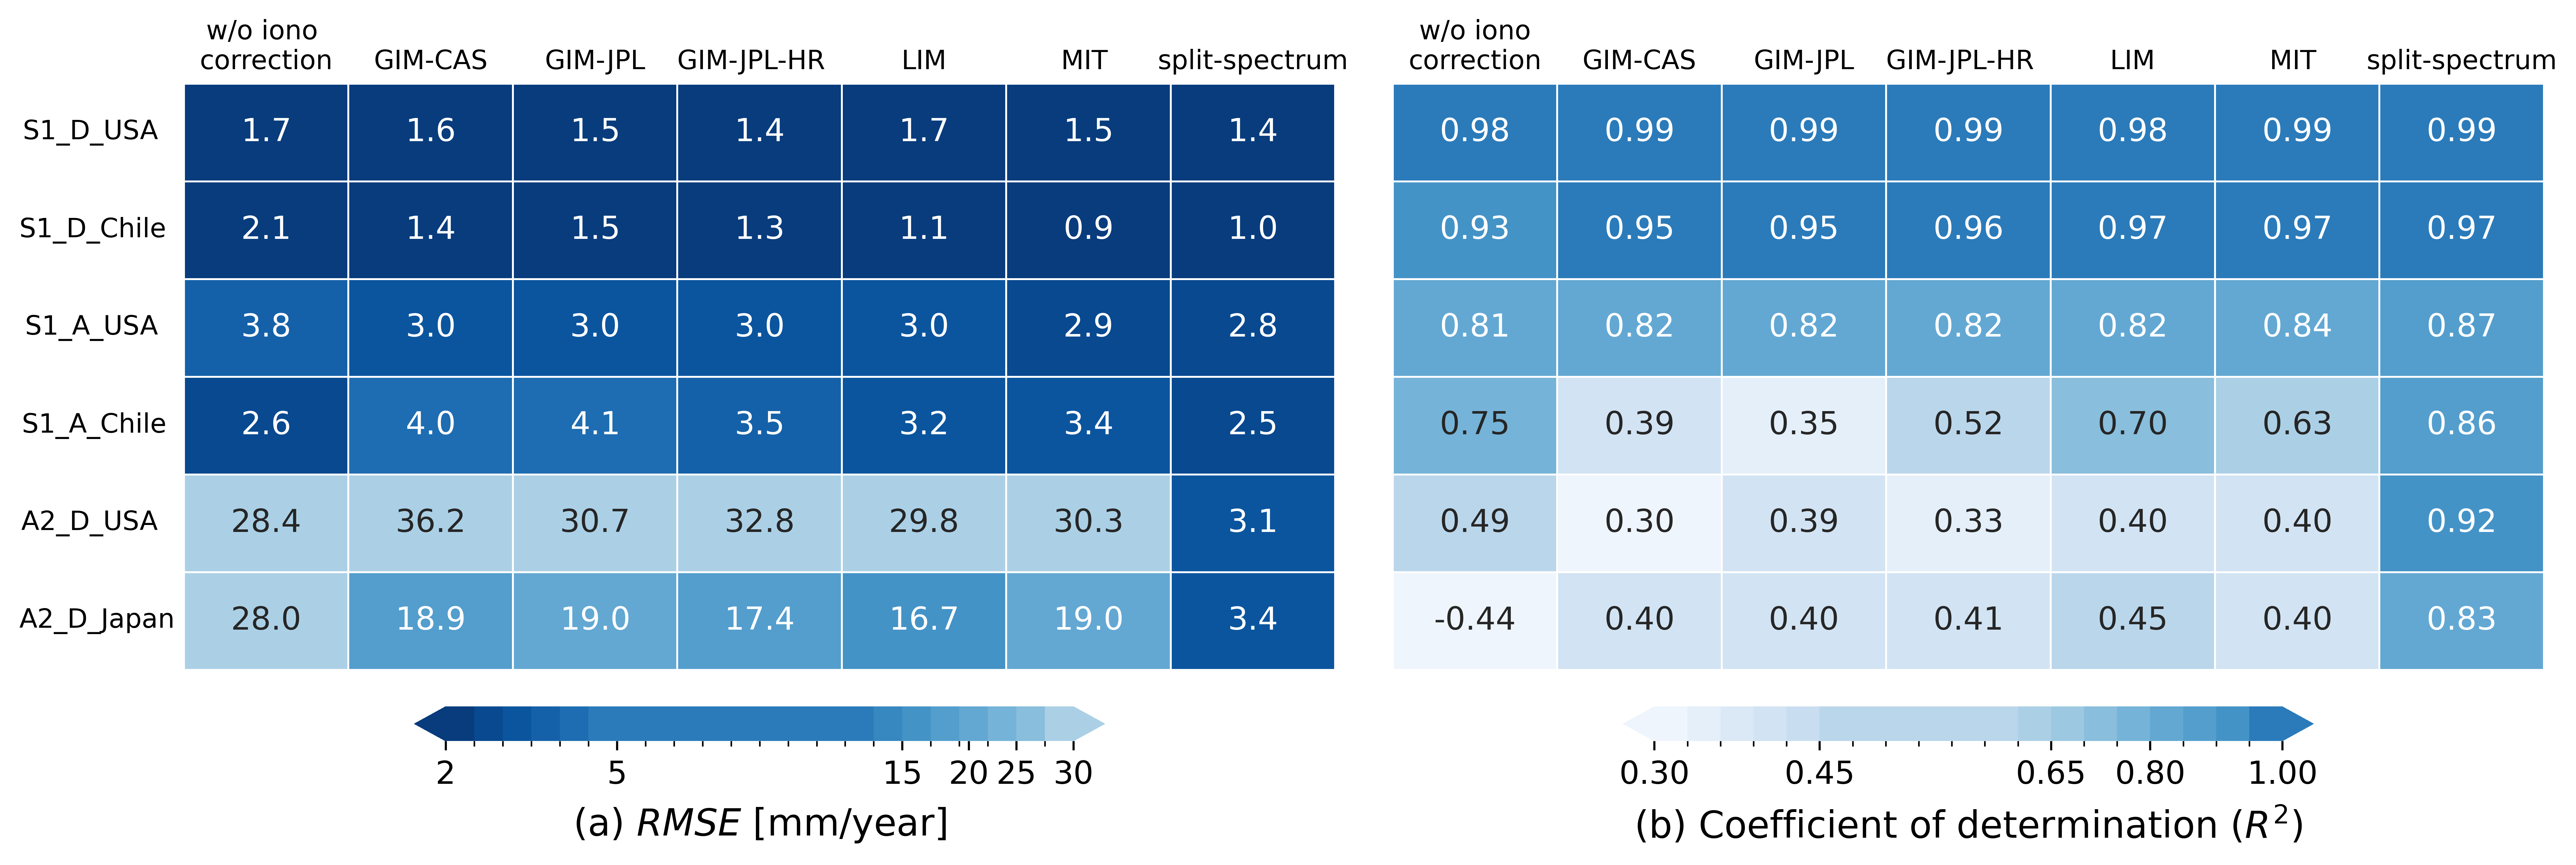

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

# ---------------------- 1. 数据准备（不变）----------------------
data1 = {
    '': ['w/o iono\ncorrection', '\nGIM-CAS', '\nGIM-JPL',  '\nGIM-JPL-HR  ', '\nLIM', '\nMIT ', '\nsplit-spectrum'],
    '\n': [0.98, 0.99, 0.99, 0.99, 0.98, 0.99,0.99],
    '\n\n': [0.93, 0.95, 0.95, 0.96, 0.97, 0.97,0.97],
    '\n\n\n ': [0.81,  0.82, 0.82, 0.82, 0.82, 0.84,0.87],
    '\n\n\n\n ': [0.75,  0.39, 0.35, 0.52, 0.70, 0.63,0.86],
    '\n\n\n\n\n ': [0.49,  0.30, 0.39,  0.33, 0.40,0.40,0.92],
    '\n\n\n\n\n\n ': [-0.44,  0.40, 0.40, 0.41,0.45,0.40,0.83],
}
df1 = pd.DataFrame(data1).set_index('')

data2 = {
    '': ['w/o iono \ncorrection', '\nGIM-CAS',  '\nGIM-JPL',  '\nGIM-JPL-HR  ','\nLIM', '\nMIT ','\nsplit-spectrum'],
    'S1_D_USA  ': [1.7,  1.6, 1.5, 1.4,1.7, 1.5,1.4],
    'S1_D_Chile ': [2.1,  1.4, 1.5, 1.3,1.1, 0.9,1.0],
    'S1_A_USA  ': [3.8, 3.0, 3.0, 3.0, 3.0,2.9,2.8],
    'S1_A_Chile ': [2.6,   4.0, 4.1, 3.5, 3.2,3.4,2.5],
    'A2_D_USA  ':[28.4,  36.2, 30.7, 32.8 ,29.8, 30.3,3.1],
    'A2_D_Japan':[28.0,   18.9, 19.0,  17.4,16.7,19.0,3.4]
}
df2 = pd.DataFrame(data2).set_index('')

# ---------------------- 2. 关键修改：修复颜色反转问题（用列表切片[::-1]替代.reversed()）----------------------
# 左侧RMSE调色板（2-30渐变变浅，5-15固定色）
# 步骤1：生成Blues色系并转为列表，再用[::-1]反转（实现从深到浅）
rmse_blue = list(sns.color_palette("Blues", 20))[::-1]  # 核心修复：先转列表再反转

# 步骤2：定义RMSE数值边界
rmse_bounds = [2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 19, 22, 25, 28, 30]

# 步骤3：构建颜色序列（渐变+固定色）
rmse_colors = []
rmse_colors.extend(rmse_blue[:6])  # 2-5渐变
fixed_color_rmse = rmse_blue[5]
rmse_colors.extend([fixed_color_rmse] * 10)  # 5-15固定色
rmse_colors.extend(rmse_blue[6:14])  # 15-30渐变
rmse_cmap = ListedColormap(rmse_colors)
rmse_norm = BoundaryNorm(rmse_bounds, rmse_cmap.N)

# 右侧R²调色板（0.3-1渐变变深，0.45-0.65固定色）
# 步骤1：生成Blues色系（默认从浅到深，无需反转）
r2_blue = list(sns.color_palette("Blues", 20))  # 转为列表，统一格式

# 步骤2：定义R²数值边界
r2_bounds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.51, 0.54, 0.57, 0.6, 0.63, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

# 步骤3：构建颜色序列（渐变+固定色）
r2_colors = []
r2_colors.extend(r2_blue[:6])  # 0.3-0.45渐变
fixed_color_r2 = r2_blue[5]
r2_colors.extend([fixed_color_r2] * 6)  # 0.45-0.65固定色
r2_colors.extend(r2_blue[6:15])  # 0.65-1渐变
r2_cmap = ListedColormap(r2_colors)
r2_norm = BoundaryNorm(r2_bounds, r2_cmap.N)

# ---------------------- 3. 绘制热图（不变）----------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 5), dpi=600)

# 左侧RMSE热图
heatmap2 = sns.heatmap(
    df2.T,
    annot=True,
    annot_kws={'size': 12},
    cmap=rmse_cmap,
    norm=rmse_norm,
    fmt=".1f",
    linewidths=.5,
    vmin=2, vmax=30,
    cbar_kws={
        'ticks': [2, 5, 15, 20, 25, 30],
        'orientation': 'horizontal',
        'pad': 0.05, 'shrink': 0.6,
        'extend': 'both'
    },
    ax=axes[0]
)
cbar2 = heatmap2.collections[0].colorbar
cbar2.set_label(r'(a) $RMSE$ [mm/year]', labelpad=6, fontsize=14)
cbar2.ax.tick_params(labelsize=12)
axes[0].xaxis.set_ticks_position('top')
axes[0].tick_params(axis='both', which='both', length=0)

# 右侧R²热图
heatmap1 = sns.heatmap(
    df1.T,
    annot=True,
    annot_kws={'size': 12},
    cmap=r2_cmap,
    norm=r2_norm,
    fmt=".2f",
    linewidths=.5,
    vmin=0.3, vmax=1.0,
    cbar_kws={
        'ticks': [0.3, 0.45, 0.65, 0.8, 1.0],
        'orientation': 'horizontal',
        'pad': 0.05, 'shrink': 0.6,
        'extend': 'both'
    },
    ax=axes[1]
)
cbar1 = heatmap1.collections[0].colorbar
cbar1.set_label(r'(b) Coefficient of determination ($R^2$)', labelpad=6, fontsize=14)
cbar1.ax.tick_params(labelsize=12)
axes[1].xaxis.set_ticks_position('top')
axes[1].tick_params(axis='both', which='both', length=0)

# 全局调整
plt.subplots_adjust(wspace=0.05)
for ax in axes:
    for text in ax.texts:
        text.set_verticalalignment('center')

plt.savefig('pdf/R2+RMSE.pdf', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

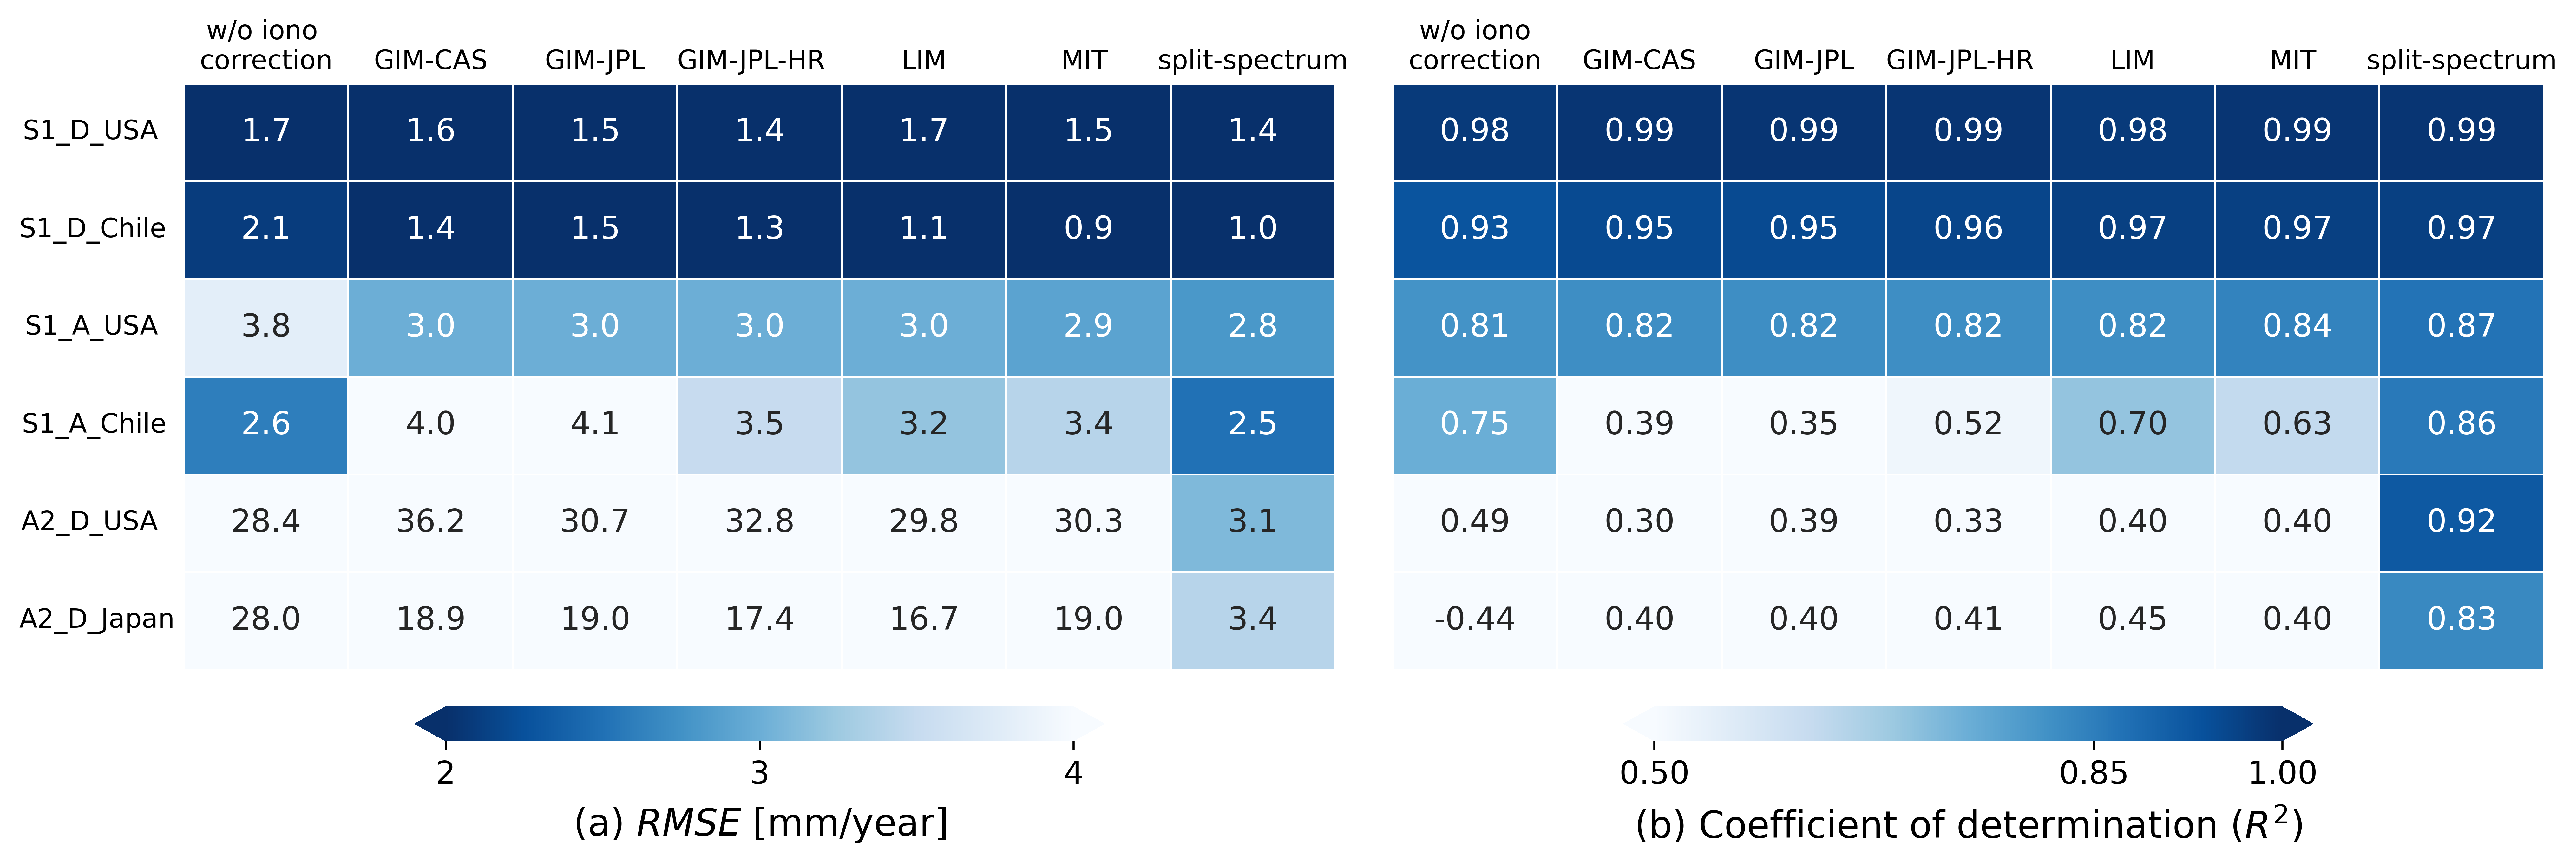

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ---------------------- 1. 数据准备（与原代码完全一致，无修改）----------------------
# R²数据
data1 = {
    '': ['w/o iono\ncorrection', '\nGIM-CAS', '\nGIM-JPL',  '\nGIM-JPL-HR  ', '\nLIM', '\nMIT ', '\nsplit-spectrum'],
    '\n': [0.98, 0.99, 0.99, 0.99, 0.98, 0.99,0.99],
    '\n\n': [0.93, 0.95, 0.95, 0.96, 0.97, 0.97,0.97],
    '\n\n\n ': [0.81,  0.82, 0.82, 0.82, 0.82, 0.84,0.87],
    '\n\n\n\n ': [0.75,  0.39, 0.35, 0.52, 0.70, 0.63,0.86],
    '\n\n\n\n\n ': [0.49,  0.30, 0.39,  0.33, 0.40,0.40,0.92],
    '\n\n\n\n\n\n ': [-0.44,  0.40, 0.40, 0.41,0.45,0.40,0.83],
}
df1 = pd.DataFrame(data1).set_index('')

# RMSE数据
data2 = {
    '': ['w/o iono \ncorrection', '\nGIM-CAS',  '\nGIM-JPL',  '\nGIM-JPL-HR  ','\nLIM', '\nMIT ','\nsplit-spectrum'],
    'S1_D_USA  ': [1.7,  1.6, 1.5, 1.4,1.7, 1.5,1.4],
    'S1_D_Chile ': [2.1,  1.4, 1.5, 1.3,1.1, 0.9,1.0],
    'S1_A_USA  ': [3.8, 3.0, 3.0, 3.0, 3.0,2.9,2.8],
    'S1_A_Chile ': [2.6,   4.0, 4.1, 3.5, 3.2,3.4,2.5],
    'A2_D_USA  ':[28.4,  36.2, 30.7, 32.8 ,29.8, 30.3,3.1],
    'A2_D_Japan':[28.0,   18.9, 19.0,  17.4,16.7,19.0,3.4]
}
df2 = pd.DataFrame(data2).set_index('')

# 反转Blues调色板（与原代码一致）
custom_cmap = sns.color_palette("Blues", as_cmap=True).reversed()

# ---------------------- 2. 创建画布（与原代码一致，无修改）----------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 5), dpi=600)

# ---------------------- 3. 【顺序颠倒1】先画原第二个子图（RMSE热图）→ 现在用axes[0]（左侧）----------------------
heatmap2 = sns.heatmap(
    df2.T,
    annot=True,                    # 显示格子数字
    annot_kws={'size': 12},        # 格子数字字体大小不变
    cmap=custom_cmap,              # 原颜色映射不变
    fmt=".1f",                     # 数字格式不变
    linewidths=.5,                 # 格子边框宽度不变
    vmin=2, vmax=4,                # 数值范围不变
    cbar_kws={
        'ticks': [2, 3, 4],
        'orientation': 'horizontal',
        'pad': 0.05, 'shrink': 0.6,
        'extend': 'both'           # 保留colorbar两端尖端
    },
    ax=axes[0]  # 关键：原axes[1]→改为axes[0]，让RMSE热图显示在左侧
)

# 设置RMSE热图的colorbar（配置不变，仅对应heatmap2变量）
cbar2 = heatmap2.collections[0].colorbar
cbar2.set_label(
    r'(a) $RMSE$ [mm/year]', 
    labelpad=6, 
    fontsize=14
)
cbar2.ax.tick_params(
    labelsize=12
)

# 调整RMSE热图的坐标轴（配置不变，仅对应axes[0]）
axes[0].xaxis.set_ticks_position('top')
axes[0].tick_params(axis='both', which='both', length=0)

# ---------------------- 4. 【顺序颠倒2】再画原第一个子图（R²热图）→ 现在用axes[1]（右侧）----------------------
heatmap1 = sns.heatmap(
    df1.T,
    annot=True,                    # 显示格子数字
    annot_kws={'size': 12},        # 格子数字字体大小不变
    cmap='Blues',                  # 原颜色映射不变
    fmt=".2f",                     # 数字格式不变
    linewidths=.5,                 # 格子边框宽度不变
    vmin=0.5, vmax=1.0,            # 数值范围不变
    cbar_kws={
        'ticks': [0.5, 0.85, 1.0],
        'orientation': 'horizontal',
        'pad': 0.05, 'shrink': 0.6,
        'extend': 'both'           # 保留colorbar两端尖端
    },
    ax=axes[1]  # 关键：原axes[0]→改为axes[1]，让R²热图显示在右侧
)

# 设置R²热图的colorbar（配置不变，仅对应heatmap1变量）
cbar1 = heatmap1.collections[0].colorbar
cbar1.set_label(
    r'(b) Coefficient of determination ($R^2$)', 
    labelpad=6, 
    fontsize=14
)
cbar1.ax.tick_params(
    labelsize=12
)

# 调整R²热图的坐标轴（配置不变，仅对应axes[1]）
axes[1].xaxis.set_ticks_position('top')
axes[1].tick_params(axis='both', which='both', length=0)

# ---------------------- 5. 全局调整（与原代码完全一致，无修改）----------------------
plt.subplots_adjust(wspace=0.05)
# 确保格子数字垂直居中
for ax in axes:
    for text in ax.texts:
        text.set_verticalalignment('center')

# 保存与显示（与原代码一致）
plt.savefig('pdf/R2+RMSE.pdf', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

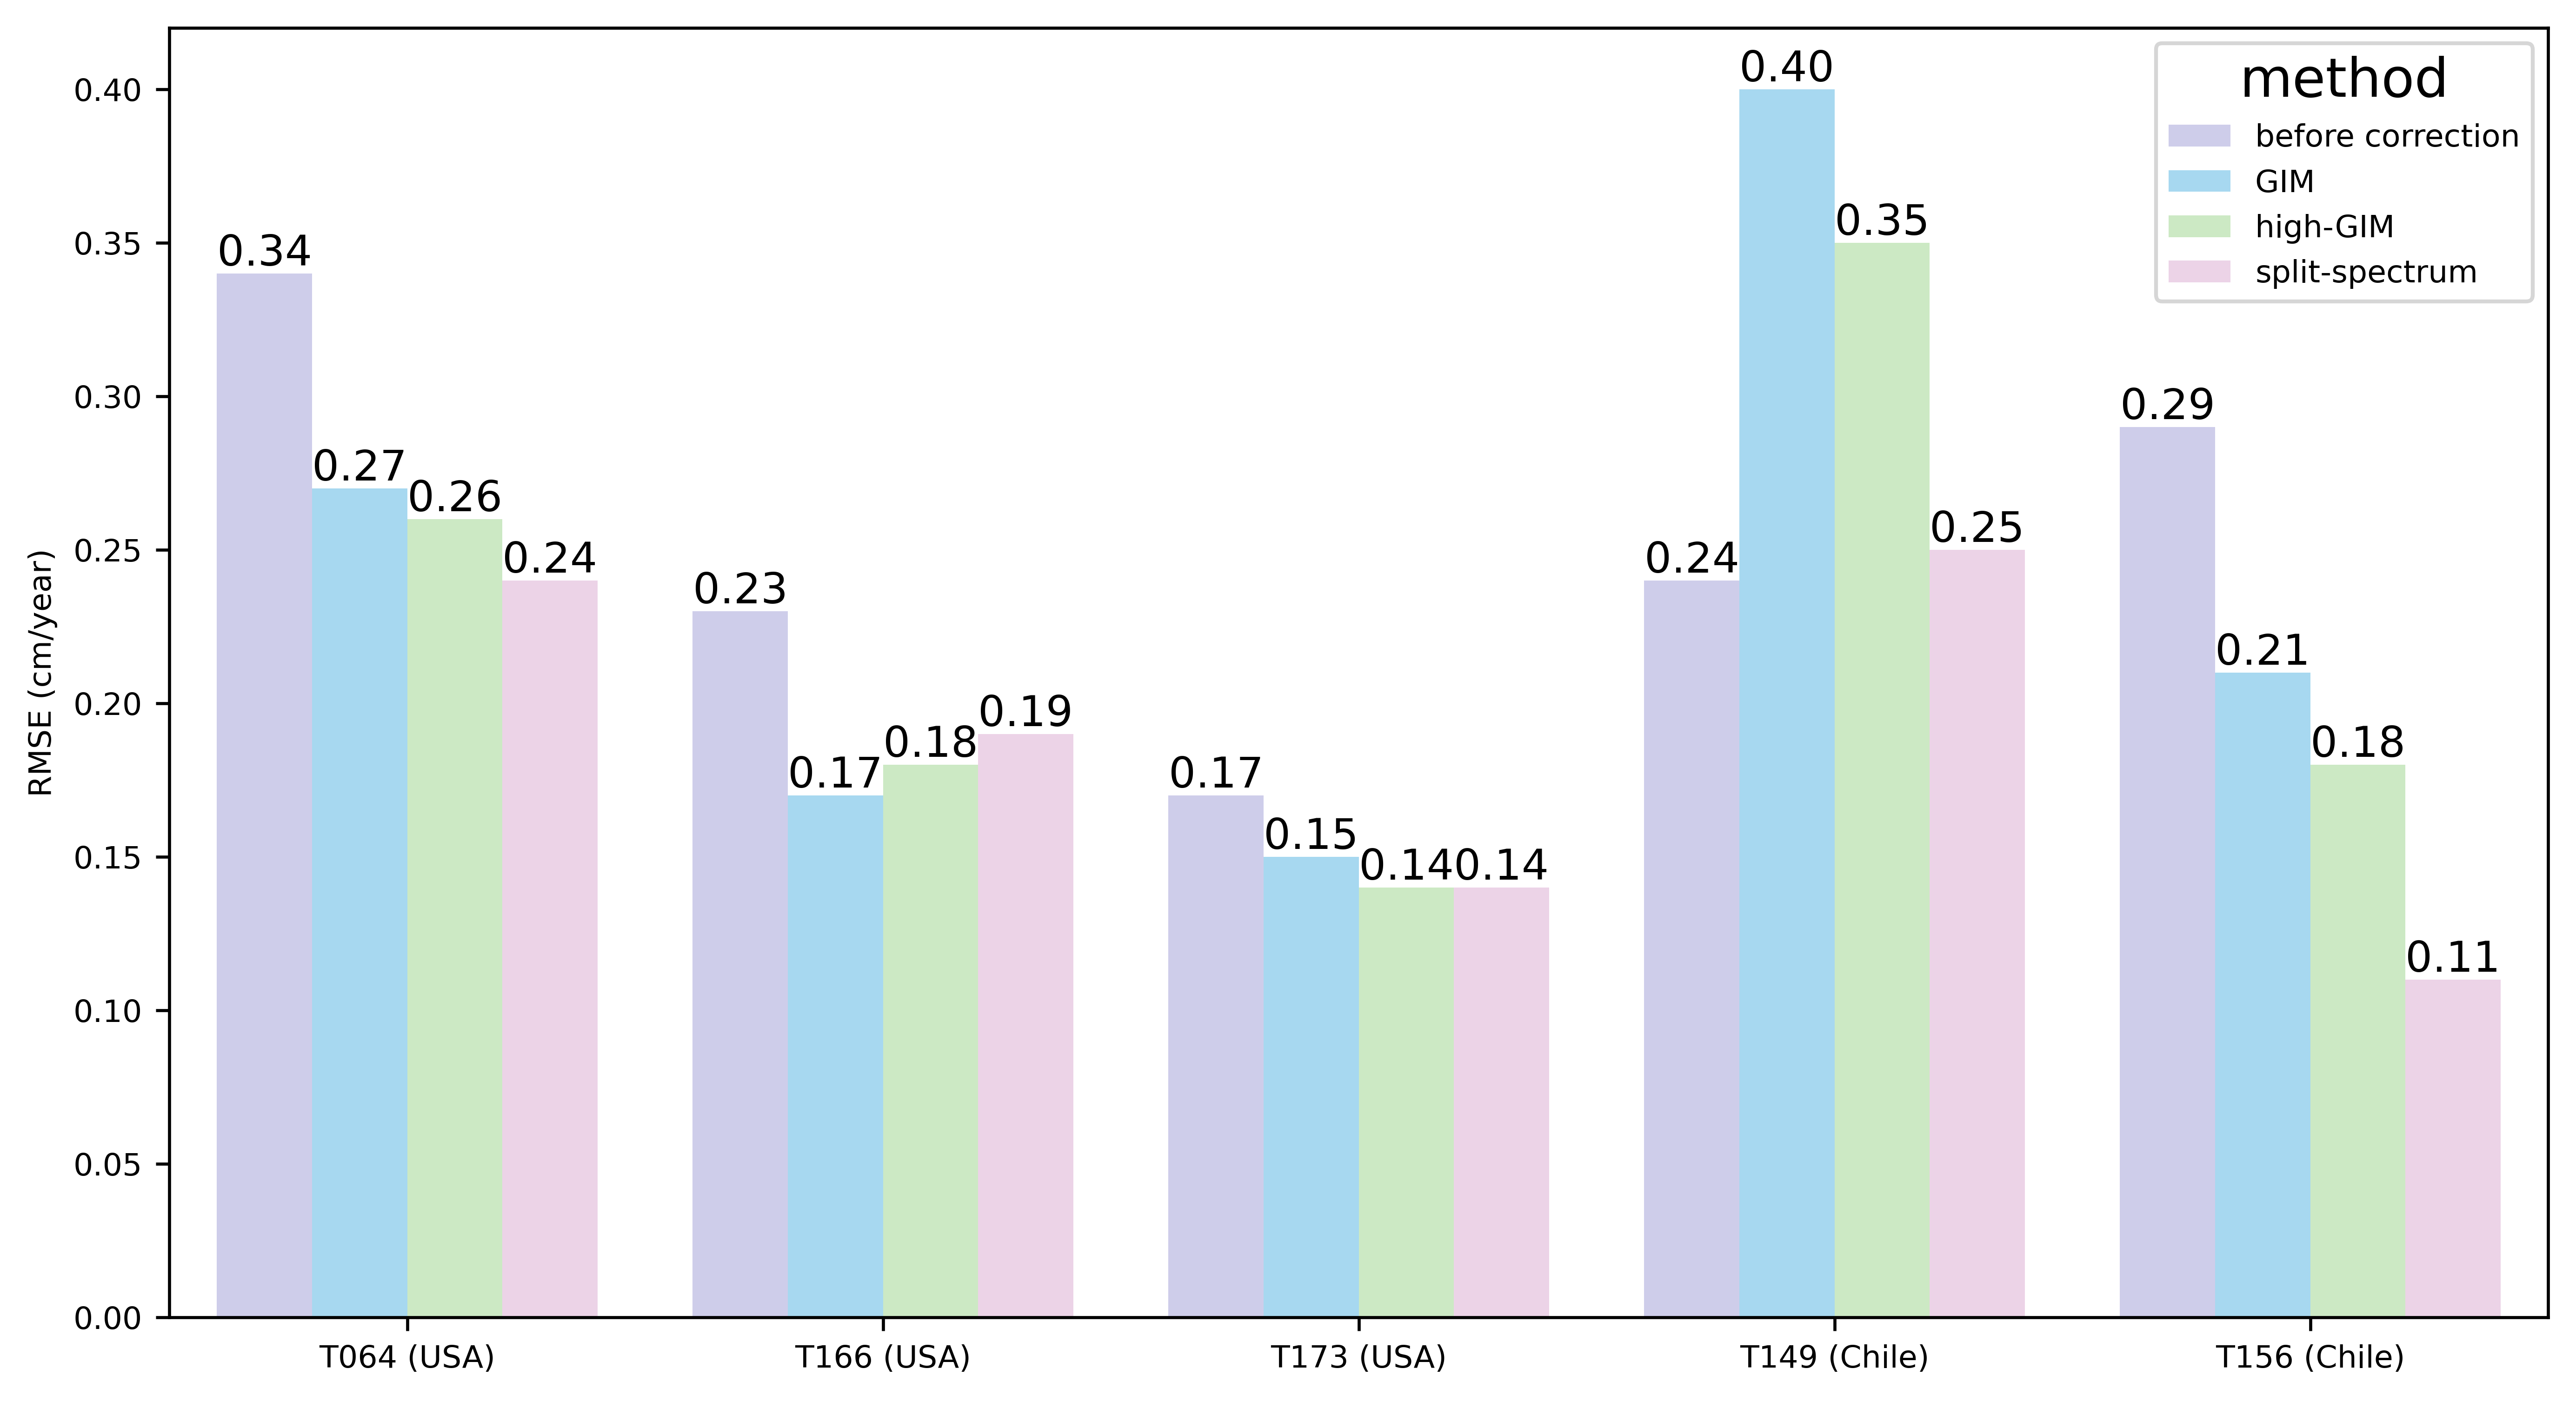

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 14})
# 创建数据
data = {
   'method': ['before correction', 'GIM ', 'high-GIM','split-spectrum'],
   'T064 (USA)': [0.34, 0.27, 0.26, 0.24],
   'T166 (USA)': [0.23, 0.17, 0.18, 0.19],
   'T173 (USA)': [0.17, 0.15, 0.14, 0.14],
   'T149 (Chile)': [0.24, 0.40, 0.35, 0.25],
   'T156 (Chile)': [0.29, 0.21, 0.18, 0.11]
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 长格式数据转换，以便绘制柱状图
df_melt = pd.melt(df, id_vars='method', var_name='region', value_name='RMSE (cm/year)')

# 按照颜色对应关系设置颜色
custom_palette = ["#CAC8EF", "#9BDCFC", "#C9EFBE", "#F0CFEA"]
sns.set_palette(custom_palette)

# 创建柱状图，调整图像大小
plt.figure(dpi = 600, figsize=(11, 6))
ax = sns.barplot(x='region', y='RMSE (cm/year)', hue='method', data=df_melt)

# 设置绘图风格，不显示网格线
ax.grid(False)

for p in ax.patches[0:20]:
    height = p.get_height()
    ax.annotate('{:.2f}'.format(height), (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# 设置轴标签和标题
plt.xlabel('')
plt.ylabel(r'RMSE (cm/year)')
plt.title('')

# 保存图片为PDF
plt.savefig('pdf/RMSE.pdf', bbox_inches='tight', transparent=True, dpi=600)
# 显示图形
plt.show()